In [224]:
import numpy as np

In [315]:
class GridWorld:
    
    def __init__(self, shape=(5,5), A=(0,1), B=(0,3)):
        self.height=shape[0]
        self.width=shape[1]
        self.x=0
        self.y=0
        self.x_prev=0
        self.y_prev=0
        self.A = A
        self.B = B
    
    def move(self, action):
        self.x_prev=self.x
        self.y_prev=self.y
        if action=="right":
            self.y+=1
        elif action=="left":
            self.y-=1
        elif action=="up":
            self.x-=1
        elif action=="down":
            self.x+=1
        return self.reward()
    
    def reward(self):
        if (self.x_prev, self.y_prev) == self.A:
            self.x=4
            self.y=1
            return 10
        elif not (self.x in range(self.height) and self.y in range(self.width)):
            self.x=self.x_prev
            self.y=self.y_prev
            return -1
        elif (self.x_prev, self.y_prev) == self.B:
            self.x=2
            self.y=3
            return 5
        else:
            return 0
        
    def location(self):
        return (self.x, self.y)

In [316]:
world = GridWorld()

In [317]:
def random_policy_evaluation():
    while True:
        delta = 0
        for state in state_value.keys():
            old = state_value[state]
            state_value[state] = random_expected_reward(state)
            delta = max(delta, np.abs(old-state_value[state]))
        if delta < theta:
            break

In [318]:
def random_expected_reward(state):
    world.x=state[0]
    world.y=state[1]
    reward = 0
    for action in A:
        imediate_reward = world.move(action)
        next_state_value = state_value[world.location()]
        reward += 0.25 * (imediate_reward + gamma * next_state_value)
        world.x=world.x_prev
        world.y=world.y_prev
    return reward

In [323]:
def value_iteration():
    while True:
        delta = 0
        for state in state_value.keys():
            world.x=state[0]
            world.y=state[1]
            reward = 0
            old = state_value[state]
            options = []
            for a in A:
                options.append(world.move(a) + gamma * state_value[world.location()])
                world.x=world.x_prev
                world.y=world.y_prev
            state_value[state] = max(options)
            delta = max(delta, np.abs(old-state_value[state]))
        if delta < theta:
            break

In [335]:
def expected_reward(state, action):
    world.x=state[0]
    world.y=state[1]
    imediate_reward = world.move(action)
    next_state_value = state_value[world.location()]
    reward = 1 * (imediate_reward + gamma * next_state_value)
    return reward

def policy_evaluation():
    while True:
        delta = 0
        for state in state_value.keys():
            world.x=state[0]
            world.y=state[1]
            reward = 0
            old = state_value[state]
            state_value[state] = expected_reward(state, policy[state])
            delta = max(delta, np.abs(old-state_value[state]))
        if delta < theta:
            break
            
def policy_improvement():
    policy_stable = True
    for state in state_value.keys():
        old = policy[state]
        policy[state] = max(A, key=lambda x: expected_reward(state, x))
        if old != policy[state]:
            policy_stable = False
    return policy_stable

In [338]:
theta = 10e-5
gamma = 0.9

# actions (- is loc2 --> loc1 and + is loc1 --> loc2)
A = ["up", "down", "left", "right"]

# state-value function
state_value = {
    k:v for k,v in zip(
        ((first, second) for first in range(world.height) for second in range(world.width)), 
        np.random.rand(world.height*world.width)
    )
}

# policy
policy = {
    k:v for k,v in zip(
        ((first, second) for first in range(world.height) for second in range(world.width)), 
        np.random.choice(A, world.height*world.width)
    )
}

while True:
    policy_evaluation()
    if policy_improvement():
        break

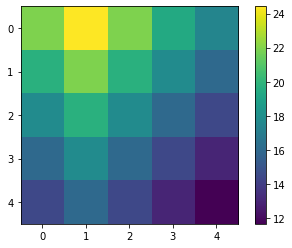

In [339]:
import matplotlib.pyplot as plt
plt.imshow(np.array(list(state_value.values())).reshape(5,5))
plt.colorbar()

In [340]:
policy

{(0, 0): 'right',
 (0, 1): 'up',
 (0, 2): 'left',
 (0, 3): 'down',
 (0, 4): 'left',
 (1, 0): 'right',
 (1, 1): 'up',
 (1, 2): 'up',
 (1, 3): 'left',
 (1, 4): 'left',
 (2, 0): 'right',
 (2, 1): 'up',
 (2, 2): 'up',
 (2, 3): 'up',
 (2, 4): 'up',
 (3, 0): 'right',
 (3, 1): 'up',
 (3, 2): 'up',
 (3, 3): 'up',
 (3, 4): 'up',
 (4, 0): 'right',
 (4, 1): 'up',
 (4, 2): 'up',
 (4, 3): 'up',
 (4, 4): 'up'}